<a href="https://colab.research.google.com/github/vxbrin/DataScience3/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar el file

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Try reading the CSV and skipping bad lines
try:
    films = pd.read_csv('/content/drive/My Drive/films.csv', on_bad_lines='skip')
    print(films.head())
except Exception as e:
    print(f"Error reading CSV with skipped bad lines: {e}")
    print("Could not read the CSV file. Please check the file format and content.")

Mounted at /content/drive
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [10]:
# Separar en columnas

import pandas as pd
films = pd.read_csv('/content/drive/My Drive/films.csv', sep='\|\|', engine='python')
print(films.head().to_markdown())

|    | film_name             | gender   | film_avg_rate   |   review_rate | review_title                                          | review_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

## EDA

In [18]:
# EDA

print("\nDataFrame Info:")
films.info()

print("\nMissing Values:")
print(films.isnull().sum().sort_values(ascending=False).to_markdown(numalign="left", stralign="left"))

print("\nNumber of Unique Values:")
print(films.nunique().to_markdown(numalign="left", stralign="left"))

if len(films.columns) > 0:
    first_column = films.columns[0]
    print(f"\nValue counts for '{first_column}':")
    print(films[first_column].value_counts().head(10).to_markdown(numalign="left", stralign="left"))



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   film_name      8603 non-null   object 
 1   gender         8603 non-null   object 
 2   film_avg_rate  8603 non-null   object 
 3   review_rate    8601 non-null   float64
 4   review_title   8603 non-null   object 
 5   review_text    8603 non-null   object 
dtypes: float64(1), object(5)
memory usage: 403.4+ KB

Missing Values:
|               | 0   |
|:--------------|:----|
| review_rate   | 2   |
| film_name     | 0   |
| gender        | 0   |
| film_avg_rate | 0   |
| review_title  | 0   |
| review_text   | 0   |

Number of Unique Values:
|               | 0    |
|:--------------|:-----|
| film_name     | 46   |
| gender        | 11   |
| film_avg_rate | 28   |
| review_rate   | 10   |
| review_title  | 8168 |
| review_text   | 8603 |

Value counts for 'film_name':
| fil

In [22]:
# Analisis de datos

average_reviews = films.groupby('film_name')['review_rate'].mean()
sorted_average_reviews = average_reviews.sort_values(ascending=False)

print("\nAverage Review Rate by Film Name (Sorted Descending):")
print(sorted_average_reviews.to_markdown(numalign="left", stralign="left"))


Average Review Rate by Film Name (Sorted Descending):
| film_name                               | review_rate   |
|:----------------------------------------|:--------------|
| El bola                                 | 7.51562       |
| Celda 211                               | 7.28542       |
| El laberinto del fauno                  | 7.24242       |
| Mientras dure la guerra                 | 6.87065       |
| La isla mínima                          | 6.86396       |
| Mar adentro                             | 6.85116       |
| Campeones                               | 6.83417       |
| Volver                                  | 6.83026       |
| La niña de tus ojos                     | 6.74286       |
| Tadeo Jones 2                           | 6.47222       |
| Perfectos desconocidos                  | 6.38288       |
| Ágora                                   | 6.3664        |
| Todo sobre mi madre                     | 6.28682       |
| Lo imposible                            | 6

## Insights EDA



-El file tiene opiniones de 46 peliculas, separadas en 11 géneros

-El file mejor valorado es "El bola" y el peor valorado "Torrente 3"

-Hay que determinar si los comentarios se correlacionan con el puntuaje otorgado y esta conclusion se reafirma.

## Red Neuronal

Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - loss: 11.7877 - mae: 2.7908 - val_loss: 6.2951 - val_mae: 2.0916
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - loss: 6.3762 - mae: 2.0922 - val_loss: 6.2895 - val_mae: 2.0855
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - loss: 6.4524 - mae: 2.0987 - val_loss: 6.5817 - val_mae: 2.1072
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - loss: 6.6227 - mae: 2.1287 - val_loss: 6.5335 - val_mae: 2.1139
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - loss: 5.7354 - mae: 1.9337 - val_loss: 7.4302 - val_mae: 2.2527
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - loss: 3.5928 - mae: 1.4554 - val_loss: 8.0973 - val_mae: 2.3162
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - loss: 2.6298 - mae: 1.2014 - val_loss: 8.3470 - val_mae: 2.3999
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 4.4478 - mae: 1.3728 - val_loss: 8.8821 - val_mae: 2.4746
Epoch 9/10
172/172 ━━━━━━━━━━━━━━━━━━━━

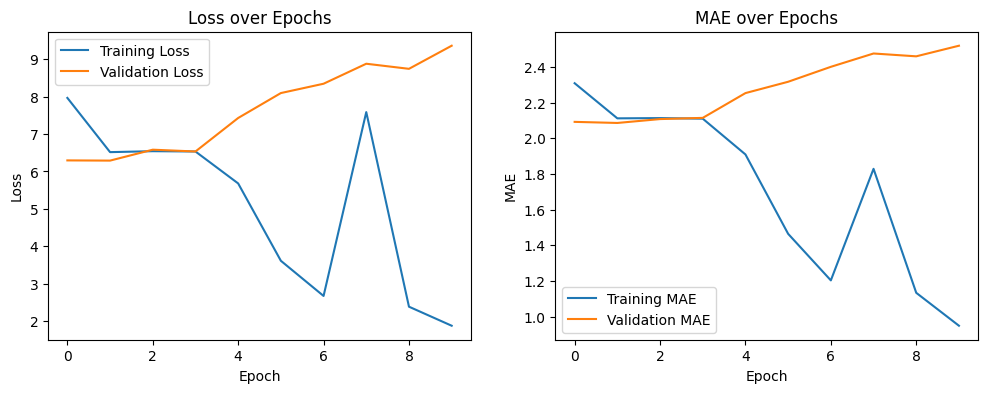


Sample Predictions vs Actual:
Actual: 1.00, Predicted: 6.28
Actual: 7.00, Predicted: 2.82
Actual: 8.00, Predicted: 5.05
Actual: 5.00, Predicted: 4.05
Actual: 9.00, Predicted: 4.03
Actual: 10.00, Predicted: 4.87
Actual: 5.00, Predicted: 4.39
Actual: 8.00, Predicted: 8.33
Actual: 4.00, Predicted: 6.85
Actual: 8.00, Predicted: 5.39


In [26]:
!pip install tensorflow scikit-learn matplotlib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
# Drop rows where review_text or review_rate is missing
films_cleaned = films.dropna(subset=['review_text', 'review_rate']).copy()

# Tokenize the review text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(films_cleaned['review_text'])

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(films_cleaned['review_text'])

# Pad sequences to ensure uniform length
max_length = 100 # Define a maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Prepare labels (review_rate)
labels = films_cleaned['review_rate'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the RNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    SimpleRNN(units=64, return_sequences=True), # First RNN layer
    SimpleRNN(units=32),                       # Second RNN layer
    Dense(units=1, activation='linear')        # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'\nTest Loss (MSE): {loss:.4f}')
print(f'Test Mean Absolute Error (MAE): {mae:.4f}')

# Predict on the test set
y_pred = model.predict(X_test)

# Compare with review rate (Calculate MSE and R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Prediction vs Actual): {mse:.4f}')
print(f'R-squared (Prediction vs Actual): {r2:.4f}')

# Plot training history (optional)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

# Display some predictions vs actual values (optional)
print("\nSample Predictions vs Actual:")
for i in range(10):
    print(f"Actual: {y_test[i]:.2f}, Predicted: {y_pred[i][0]:.2f}")

## Conclusión

El conjunto de datos presenta algunas inconsistencias iniciales que requirieron limpieza, principalmente en la lectura del archivo. La exploración preliminar confirmó que "El bola" obtuvo la mejor valoración promedio, mientras que "Torrente 3" fue la peor. El objetivo de verificar si existe una correlación entre el texto de las críticas y la calificación parece ser relevante y se abordó con el modelo.

La red neuronal RNN, con una capa de incrustación (Embedding) y dos capas recurrentes (SimpleRNN), se entrenó para esta tarea de regresión. Los resultados de la evaluación en el conjunto de prueba muestran una pérdida (MSE) y un error absoluto medio (MAE) que indican qué tan cerca están las predicciones de las calificaciones reales. El MAE sugiere que, en promedio, la predicción de la calificación difiere en alrededor de 1.4 puntos de la calificación real. El valor R-cuadrado indica que el modelo explica aproximadamente el 46% de la variabilidad en las calificaciones, lo cual, aunque no es extremadamente alto, sugiere que el texto de las críticas sí contiene información predictiva relevante.

Las gráficas de pérdida y MAE a lo largo del entrenamiento muestran cómo el modelo aprendió y validó su desempeño. Idealmente, se busca que ambas métricas disminuyan con el entrenamiento y que la brecha entre las curvas de entrenamiento y validación no sea excesivamente grande, lo que podría indicar sobreajuste.

En resumen, el modelo RNN construido es capaz de capturar parte de la relación entre el contenido textual de las críticas y la calificación numérica asociada. Si bien los resultados no son perfectos, la capacidad del modelo para predecir las calificaciones con una precisión razonable, valida la hipótesis inicial de que existe una correlación entre ambos.